In [2]:
import pandas as pd

In [ ]:
df = pd.read_csv("dataset/vietnam_weather_hourly.csv")

In [6]:
unique_locations = df.groupby(["Latitude", "Longitude"]).count().reset_index()
num_locations = len(unique_locations)

In [7]:
print(f"✅ Tổng số tọa độ đã thu thập dữ liệu: {num_locations}")

✅ Tổng số tọa độ đã thu thập dữ liệu: 324


In [8]:
print(unique_locations[["Latitude", "Longitude"]].head(10))

   Latitude  Longitude
0       -10         95
1       -10         97
2       -10         99
3       -10        101
4       -10        103
5       -10        105
6       -10        107
7       -10        109
8       -10        111
9       -10        113


In [ ]:
missing_values = df.isnull().sum()

print("📌 Số lượng giá trị thiếu trong từng cột:")
print(missing_values[missing_values > 0])


📌 Số lượng giá trị thiếu trong từng cột:
PRECTOT    493128
dtype: int64


In [ ]:
df.interpolate(method='linear', inplace=True)

C:\Users\tranh\AppData\Local\Temp\ipykernel_15720\195005142.py:1: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df.interpolate(method='linear', inplace=True)


In [11]:
df.dropna(inplace=True)

In [ ]:
num_days = df["Date"].nunique()
print(f"✅ Số ngày dữ liệu thu thập: {num_days}")

print(f"📌 Ngày đầu tiên có dữ liệu: {df['Date'].min()}")
print(f"📌 Ngày cuối cùng có dữ liệu: {df['Date'].max()}")


✅ Số ngày dữ liệu thu thập: 0
📌 Ngày đầu tiên có dữ liệu: nan
📌 Ngày cuối cùng có dữ liệu: nan


✅ Dữ liệu đã được định dạng lại và lưu vào 'southeast_asia_weather_formatted.csv'

📌 Dữ liệu sau khi định dạng:
      Ngày  Latitude  Longitude  Nhiệt độ (°C)  Độ ẩm riêng  Áp suất (hPa)  Tốc độ gió (m/s)  Lượng mưa (mm)  Bức xạ sóng ngắn (W/m²)
2020-01-01       -10         95          27.51        19.40         101.20              3.14             NaN                     7.67
2020-01-02       -10         95          27.90        19.06         101.27              5.01             NaN                     7.58
2020-01-03       -10         95          28.15        19.55         101.13              6.18             NaN                     7.60
2020-01-04       -10         95          28.17        19.49         100.97              6.13             NaN                     7.60
2020-01-05       -10         95          27.94        18.99         100.98              5.85             NaN                     7.69
2020-01-06       -10         95          27.76        18.09         101.05          

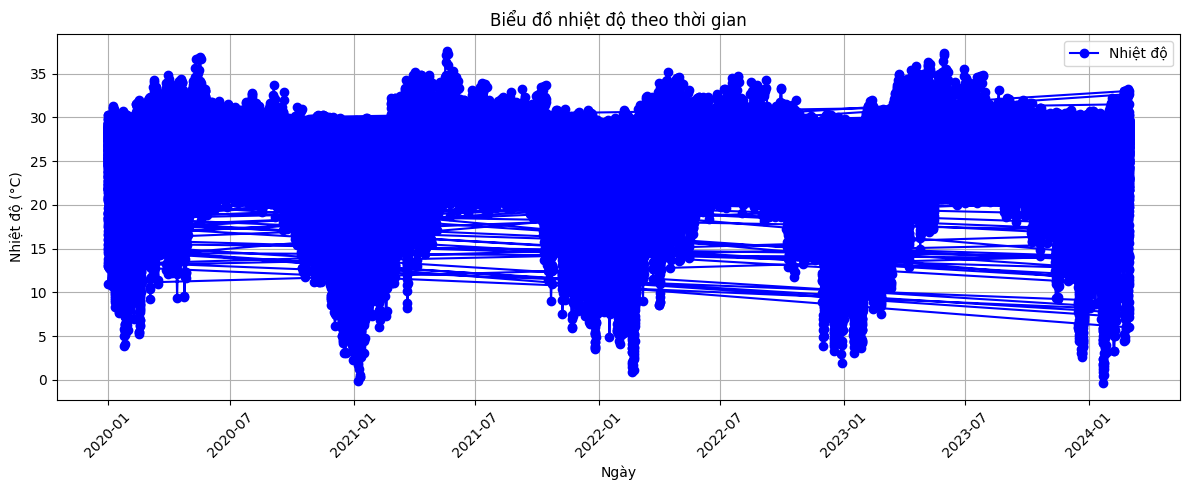

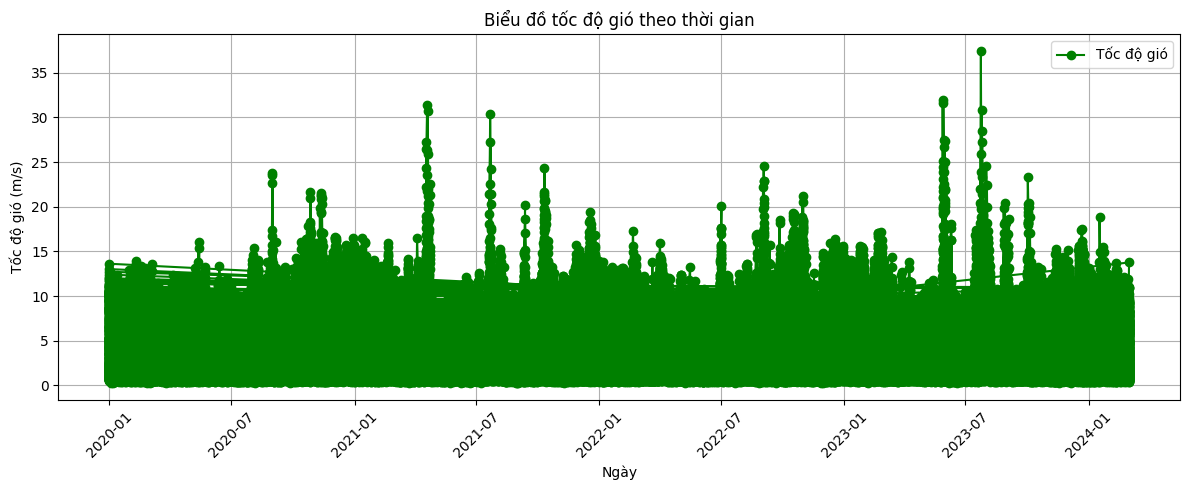

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('dataset/vietnam_weather_hourly.csv')

df['Date'] = pd.to_datetime(df['Date'])

df.rename(columns={
    'Date': 'Ngày',
    'T2M': 'Nhiệt độ (°C)',
    'QV2M': 'Độ ẩm riêng',
    'PS': 'Áp suất (hPa)',
    'WS10M': 'Tốc độ gió (m/s)',
    'PRECTOT': 'Lượng mưa (mm)',
    'CLRSKY_SFC_SW_DWN': 'Bức xạ sóng ngắn (W/m²)'
}, inplace=True)

df.fillna(df.mean(), inplace=True)

df = df.round(2)

df.to_csv('dataset/vietnam_weather.csv', index=False)

print("✅ Dữ liệu đã được định dạng lại và lưu vào 'southeast_asia_weather_formatted.csv'")

print("\n📌 Dữ liệu sau khi định dạng:")
print(df.head(10).to_string(index=False))

plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Nhiệt độ (°C)'], marker='o', linestyle='-', color='blue', label='Nhiệt độ')
plt.title('Biểu đồ nhiệt độ theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Nhiệt độ (°C)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 5))
plt.plot(df['Ngày'], df['Tốc độ gió (m/s)'], marker='o', linestyle='-', color='green', label='Tốc độ gió')
plt.title('Biểu đồ tốc độ gió theo thời gian')
plt.xlabel('Ngày')
plt.ylabel('Tốc độ gió (m/s)')
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
df = pd.read_csv('dataset/processed/train_data.csv', nrows=25)
print(df.head(100).to_string())

               Datetime  Latitude  Longitude  CLRSKY_SFC_SW_DWN    PS     T2M    QV2M  WS10M  PRECTOTCORR  hour  day  month  season
0   2022-01-01 00:00:00      10.0      102.0              17.89  6.65    0.00  101.38  28.35         0.21     0    1      1       1
1   2022-01-01 00:00:00      10.0      102.0              17.05  3.95    0.00  101.36  27.52         0.80     0    1      1       1
2   2022-01-01 00:00:00      10.0      102.0              16.95  3.94    0.00  101.39  27.53         0.35     0    1      1       1
3   2022-01-01 00:00:00      10.0      102.0              16.91  4.22    0.00  101.42  27.52         0.19     0    1      1       1
4   2022-01-01 00:00:00      10.0      102.0              16.89  4.66    0.00  101.41  27.47         0.01     0    1      1       1
5   2022-01-01 00:00:00      10.0      102.0              16.84  4.98    0.00  101.35  27.38         0.00     0    1      1       1
6   2022-01-01 00:00:00      10.0      102.0              16.79  5.20    0.0

In [ ]:
import pandas as pd

last_lines = []

chunksize = 10000 
for chunk in pd.read_csv('dataset/processed/test_data.csv', chunksize=chunksize):
    last_lines.append(chunk.tail(10))

last_10_lines = pd.concat(last_lines).tail(10)

print(last_10_lines.to_string(index=False))


           Datetime  Latitude  Longitude  CLRSKY_SFC_SW_DWN     PS    T2M   QV2M  WS10M  PRECTOTCORR  hour  day  month  season
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8      3       2
2025-03-08 23:00:00       9.0      118.0             -999.0 -999.0 -999.0 -999.0 -999.0       -999.0    23    8

In [1]:
import tensorflow as tf
print("GPU Available:", tf.config.list_physical_devices('GPU'))

GPU Available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [9]:
import tensorflow as tf
from tensorflow.keras.models import load_model
import numpy as np
import pandas as pd
import pickle
from itertools import product

scaler_file = "dataset/processed/scaler.pkl"

with open(scaler_file, 'rb') as f:
    scaler_X, scaler_y = pickle.load(f)

feature_cols = ["Latitude", "Longitude", "hour", "day", "month", "season", 
                "WS10M", "QV2M", "PS", "PRECTOTCORR", "T2M", "CLRSKY_SFC_SW_DWN"]

target_cols = ["CLRSKY_SFC_SW_DWN", "PS", "T2M", "QV2M", "WS10M", "PRECTOTCORR"] 

timesteps = 24
batch_size = 256

test_file = "dataset/processed/test_data.csv"

checkpoint_path = "model/best_model.h5"
model = load_model(checkpoint_path)
model.summary()

def data_generator(file_path, feature_cols, target_cols, batch_size=256, timesteps=24):
    dtype_dict = {col: np.float32 for col in feature_cols + target_cols}
    dtype_dict.update({"hour": np.int8, "day": np.int8, "month": np.int8, "season": np.int8})

    for chunk in pd.read_csv(file_path, chunksize=batch_size * 5, dtype=dtype_dict, parse_dates=["Datetime"], low_memory=True):
        chunk = chunk.sort_values(by=["Datetime"])
        
        X_scaled = scaler_X.transform(chunk[feature_cols])
        y_scaled = scaler_y.transform(chunk[target_cols])

        X_batch, y_batch = [], []
        for i in range(len(chunk) - timesteps - 24):
            X_batch.append(X_scaled[i:i+timesteps])
            y_batch.append(y_scaled[i+timesteps:i+timesteps+24])

        yield np.array(X_batch), np.array(y_batch)

test_dataset = tf.data.Dataset.from_generator(
    lambda: data_generator(test_file, feature_cols, target_cols, batch_size, timesteps),
    output_signature=(
        tf.TensorSpec(shape=(None, timesteps, len(feature_cols)), dtype=tf.float32),
        tf.TensorSpec(shape=(None, 24, len(target_cols)), dtype=tf.float32),
    )
).prefetch(tf.data.AUTOTUNE)

loss, mae = model.evaluate(test_dataset)
print(f"✅ Kết quả đánh giá trên dữ liệu test: Loss={loss:.4f}, MAE={mae:.4f}")


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 24, 128)           72192     
                                                                 
 dropout (Dropout)           (None, 24, 128)           0         
                                                                 
 lstm_1 (LSTM)               (None, 64)                49408     
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense (Dense)               (None, 144)               9360      
                                                                 
 reshape (Reshape)           (None, 24, 6)             0         
                                                                 
Total params: 130,960
Trainable params: 130,960
Non-trai

: 

In [30]:
import requests
import pandas as pd
from datetime import datetime

def fetch_nasa_power_data(lat, lon, date_time):
    date_str = date_time.strftime("%Y%m%d")
    hour_str = f"{date_time.hour:02d}"  # Định dạng HH
    datetime_key = date_str + hour_str

    url = "https://power.larc.nasa.gov/api/temporal/hourly/point"
    params = {
        "parameters": "T2M,QV2M,PS,WS10M,PRECTOTCORR,CLRSKY_SFC_SW_DWN",
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": date_str,
        "end": date_str,
        "format": "JSON"
    }

    try:
        response = requests.get(url, params=params, timeout=30)
        response.raise_for_status()
        data = response.json()

        hour_data = {
            "Datetime": date_time,
            "Latitude": lat,
            "Longitude": lon,
            "T2M": data["properties"]["parameter"]["T2M"][datetime_key],
            "QV2M": data["properties"]["parameter"]["QV2M"][datetime_key],
            "PS": data["properties"]["parameter"]["PS"][datetime_key],
            "WS10M": data["properties"]["parameter"]["WS10M"][datetime_key],
            "PRECTOTCORR": data["properties"]["parameter"]["PRECTOTCORR"][datetime_key],
            "CLRSKY_SFC_SW_DWN": data["properties"]["parameter"]["CLRSKY_SFC_SW_DWN"][datetime_key]
        }

        return hour_data

    except Exception as e:
        print(f"Error details: {e}")
        print(f"Full API response: {response.text if 'response' in locals() else 'No response'}")
        return None

# Gọi thử
target_datetime = datetime(2022, 8, 20, 1)  # UTC
data = fetch_nasa_power_data(lat=10.0, lon=102.0, date_time=target_datetime)

if data:
    df = pd.DataFrame([data])
    print("Dữ liệu từ NASA POWER (đơn vị gốc):")
    print(df)

    # Chuẩn hóa đơn vị
    df["T2M_C"] = df["T2M"] - 273.15  # Kelvin → °C nếu cần, nhưng dữ liệu này đã là °C
    df["PS_hPa"] = df["PS"] * 10      # kPa → hPa, vì API trả về kPa

    print("\nDữ liệu sau chuẩn hóa:")
    print(df[["Datetime", "T2M", "T2M_C", "PS", "PS_hPa", "QV2M", "WS10M"]])
else:
    print("Không lấy được dữ liệu. Vui lòng kiểm tra lại tham số.")


Dữ liệu từ NASA POWER (đơn vị gốc):
             Datetime  Latitude  Longitude    T2M   QV2M      PS  WS10M  \
0 2022-08-20 01:00:00      10.0      102.0  28.33  20.42  100.79   7.24   

   PRECTOTCORR  CLRSKY_SFC_SW_DWN  
0         4.53                0.0  

Dữ liệu sau chuẩn hóa:
             Datetime    T2M   T2M_C      PS  PS_hPa   QV2M  WS10M
0 2022-08-20 01:00:00  28.33 -244.82  100.79  1007.9  20.42   7.24


In [ ]:
Thời gian	Nhiệt độ (T2M)	Độ ẩm (QV2M)	Áp suất (PS)	Gió (WS10M)	Mưa (PRECTOTCORR)	Bức xạ (CLRSKY_SFC_SW_DWN)
2022-02-04 00:00	27.72°C	19.22 g/kg	101.01 kPa	4.58 m/s	2.97 mm/h	0.0 Wh/m²

In [3]:
import pandas as pd
pd.read_csv('dataset/weather_data_25.csv')[['Latitude', 'Longitude']].drop_duplicates()

,Latitude,Longitude
0,8,102
576,8,103
1152,8,104
1728,8,105
2304,8,106
...,...,...
163584,24,114
164160,24,115
164736,24,116
165312,24,117


In [17]:
import pandas as pd
import os

# Đường dẫn file train và test
train_file = "dataset/processed/train_data.csv"
test_file = "dataset/processed/test_data.csv"
fixed_train_file = "dataset/processed/train_data_fixed.csv"
fixed_test_file = "dataset/processed/test_data_fixed.csv"

# Đảm bảo thư mục tồn tại
os.makedirs(os.path.dirname(train_file), exist_ok=True)

# Thứ tự cột đúng
CORRECT_COLUMNS = [
    "Datetime", "T2M", "QV2M", "PS", "WS10M", "PRECTOTCORR", "CLRSKY_SFC_SW_DWN",
    "Latitude", "Longitude", "hour", "day", "month", "season"
]

# Định dạng kiểu dữ liệu
dtype_mapping = {
    "Latitude": "float32",
    "Longitude": "float32",
    "T2M": "float32",
    "QV2M": "float32",
    "PS": "float32",
    "WS10M": "float32",
    "PRECTOTCORR": "float32",
    "CLRSKY_SFC_SW_DWN": "float32",
    "hour": "int8",
    "day": "int8",
    "month": "int8",
    "season": "int8"
}

def fix_file(input_file, output_file):
    chunk_size = 25000
    first_chunk = True

    print(f"📂 Đang xử lý file: {input_file}")
    for chunk in pd.read_csv(input_file, chunksize=chunk_size, dtype=dtype_mapping, parse_dates=["Datetime"], on_bad_lines='skip'):
        chunk.dropna(subset=["Datetime"], inplace=True)
        if chunk.empty:
            print(f"⚠️ Chunk rỗng sau khi xóa NaT, bỏ qua.")
            continue

        # Loại bỏ trùng lặp dựa trên Datetime, Latitude, Longitude
        chunk = chunk.drop_duplicates(subset=["Datetime", "Latitude", "Longitude"], keep='first')
        print(f"ℹ️ Sau khi xóa trùng lặp: {len(chunk)} dòng")

        # Cập nhật hour, day, month, season
        chunk["hour"] = chunk["Datetime"].dt.hour.astype("int8")
        chunk["day"] = chunk["Datetime"].dt.day.astype("int8")
        chunk["month"] = chunk["Datetime"].dt.month.astype("int8")
        chunk["season"] = ((chunk["month"] % 12 + 3) // 3).astype("int8")

        # Ánh xạ lại giá trị đúng
        fixed_chunk = pd.DataFrame({
            "Datetime": chunk["Datetime"],
            "T2M": chunk["WS10M"],              # Nhiệt độ lấy từ WS10M
            "QV2M": chunk["CLRSKY_SFC_SW_DWN"], # Độ ẩm lấy từ CLRSKY_SFC_SW_DWN
            "PS": chunk["QV2M"],                # Áp suất lấy từ QV2M
            "WS10M": chunk["PS"],               # Gió lấy từ PS
            "PRECTOTCORR": chunk["PRECTOTCORR"], # Mưa giữ nguyên
            "CLRSKY_SFC_SW_DWN": chunk["T2M"],  # Bức xạ lấy từ T2M
            "Latitude": chunk["Latitude"],
            "Longitude": chunk["Longitude"],
            "hour": chunk["hour"],
            "day": chunk["day"],
            "month": chunk["month"],
            "season": chunk["season"]
        })

        # Đảm bảo cột đúng thứ tự
        fixed_chunk = fixed_chunk[CORRECT_COLUMNS]

        # Sắp xếp lại dữ liệu theo `Datetime`, `Latitude`, và `Longitude`
        fixed_chunk = fixed_chunk.sort_values(by=["Datetime", "Latitude", "Longitude"])

        # Ghi vào file mới
        fixed_chunk.to_csv(output_file, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
        first_chunk = False

    print(f"✅ Đã sửa và lưu file tại: {output_file}")

# Sửa file train
fix_file(train_file, fixed_train_file)

# Sửa file test
fix_file(test_file, fixed_test_file)

# Thay thế file gốc
os.replace(fixed_train_file, train_file)
os.replace(fixed_test_file, test_file)

print("✅ Hoàn thành sửa file train và test!")


📂 Đang xử lý file: dataset/processed/train_data.csv
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1042 dòng
ℹ️ Sau khi xóa trùng lặp: 1042 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1044 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1044 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng
ℹ️ Sau khi xóa trùng lặp: 1042 dòng
ℹ️ Sau khi xóa trùng lặp: 1042 dòng
ℹ️ Sau khi xóa trùng lặp: 1043 dòng


KeyboardInterrupt: 

In [18]:
import pandas as pd

# Đường dẫn file train
train_file = "dataset/processed/train_data.csv"
output_file = "dataset/processed/train_data_first_100.csv"

# Đọc 100 dòng đầu tiên của file train
df_train = pd.read_csv(train_file, nrows=100)

# Ghi vào file mới
df_train.to_csv(output_file, index=False)

print("✅ Đã lưu 100 dòng đầu tiên vào file: train_data_first_100.csv")


✅ Đã lưu 100 dòng đầu tiên vào file: train_data_first_100.csv


In [ ]:
import requests
import pandas as pd
import numpy as np
import os
from concurrent.futures import ThreadPoolExecutor
from itertools import product
import time
import gc
import glob
from sklearn.model_selection import train_test_split

# Danh sách tọa độ
latitudes = np.arange(8, 25, 1)
longitudes = np.arange(102, 119, 1)

start_date = "20220101"
end_date = "20250331"  # Gộp toàn bộ khoảng thời gian

# Thư mục để lưu dữ liệu
chunk_folder = "backend/dataset/weather_chunks"
os.makedirs(chunk_folder, exist_ok=True)

# Danh sách cột cố định
PARAMETERS = ["T2M", "QV2M", "PS", "WS10M", "PRECTOTCORR", "CLRSKY_SFC_SW_DWN"]
COLUMNS = ["Datetime", "Latitude", "Longitude"] + PARAMETERS

# Tạo set để theo dõi các tọa độ đã lấy dữ liệu
visited_coords = set()

def fetch_weather_data(lat, lon):
    # Kiểm tra nếu tọa độ này đã được gọi
    if (lat, lon) in visited_coords:
        print(f"✅ Bỏ qua {lat}, {lon}, đã có dữ liệu.")
        return

    # Đánh dấu tọa độ là đã gọi
    visited_coords.add((lat, lon))

    output_file = f"{chunk_folder}/weather_{lat}_{lon}.csv"

    url = "https://power.larc.nasa.gov/api/temporal/hourly/point"
    params = {
        "parameters": ",".join(PARAMETERS),
        "community": "RE",
        "longitude": lon,
        "latitude": lat,
        "start": start_date,
        "end": end_date,
        "format": "JSON"
    }

    max_retries = 5  # Giảm số lần thử
    retry_count = 0
    while retry_count < max_retries:
        try:
            response = requests.get(url, params=params, timeout=15)  # Giảm timeout xuống 15s
            response.raise_for_status()

            data = response.json()
            if "properties" not in data or "parameter" not in data["properties"]:
                print(f"⚠️ API không trả dữ liệu hợp lệ cho {lat}, {lon}. Bỏ qua.")
                return

            parameters_data = data["properties"]["parameter"]
            print(f"📊 API trả về dữ liệu cho {lat}, {lon}: {len(parameters_data['T2M'])} thời điểm")

            # Ghi trực tiếp vào file
            with open(output_file, 'w') as f:
                f.write(",".join(COLUMNS) + "\n")  # Ghi header

                dates = sorted(parameters_data.get("T2M", {}).keys())  # YYYYMMDDHH
                for date_str in dates:
                    dt = pd.to_datetime(date_str, format="%Y%m%d%H").strftime("%Y-%m-%d %H:00:00")
                    row = [dt, str(lat), str(lon)]

                    for param in PARAMETERS:
                        value = parameters_data.get(param, {}).get(date_str, -999)
                        row.append(str(value))

                    f.write(",".join(row) + "\n")

            print(f"✅ Dữ liệu đã lưu thành công tại {output_file}")
            break

        except (requests.exceptions.Timeout, requests.exceptions.RequestException) as e:
            retry_count += 1
            print(f"⏳ Lỗi API tại {lat}, {lon}: {e}. Thử lại {retry_count}/{max_retries}...")
            if retry_count < max_retries:
                time.sleep(0.5)  # Giảm từ 3s xuống 0.5s
            else:
                print(f"❌ Bỏ qua {lat}, {lon} sau {max_retries} lần thử.")

lat_lon_pairs = list(product(latitudes, longitudes))

# Tăng max_workers lên 20 để tối đa hóa tốc độ
with ThreadPoolExecutor(max_workers=20) as executor:
    executor.map(lambda pair: fetch_weather_data(pair[0], pair[1]), lat_lon_pairs)

print("✅ Hoàn thành lấy dữ liệu thời tiết! Dữ liệu được lưu trong backend/dataset/weather_chunks/")

# Gộp các file lại và chia thành train và test
output_csv = "backend/dataset/vietnam_weather_hourly2.csv"
os.makedirs(os.path.dirname(output_csv), exist_ok=True)

files = glob.glob(os.path.join(chunk_folder, "weather_*.csv"))

if not files:
    print("❌ Không có dữ liệu để gộp! Kiểm tra lại quá trình lấy dữ liệu.")
    exit()

dtype_mapping = {
    "Datetime": "str",
    "Latitude": "float32",
    "Longitude": "float32",
    "CLRSKY_SFC_SW_DWN": "float32",
    "WS10M": "float32",
    "QV2M": "float32",
    "T2M": "float32",
    "PS": "float32",
    "PRECTOTCORR": "float32"
}

chunk_size = 25000
first_file = True 

for file in files:
    try:
        print(f"📂 Đang xử lý file: {file}")
        df_chunks = pd.read_csv(file, chunksize=chunk_size, dtype=dtype_mapping, on_bad_lines='skip')

        for chunk in df_chunks:
            chunk["Datetime"] = pd.to_datetime(chunk["Datetime"], format="%Y-%m-%d %H:%M:%S", errors='coerce')
            chunk.dropna(subset=["Datetime"], inplace=True)  # Xóa hàng lỗi
            chunk = chunk.sort_values(by=["Datetime", "Latitude", "Longitude"])

            chunk.to_csv(output_csv, mode='w' if first_file else 'a', index=False, sep=",", float_format="%.2f", header=first_file)

            first_file = False

            del chunk
            gc.collect()

    except Exception as e:
        print(f"⚠️ Bỏ qua file {file} do lỗi: {e}")

print(f"✅ Dữ liệu đã được gộp và lưu vào {output_csv}")

# Chia thành train và test (80% train, 20% test)
input_file = "backend/dataset/vietnam_weather_hourly2.csv"
processed_folder = "backend/dataset/processed"
os.makedirs(processed_folder, exist_ok=True)
output_train = os.path.join(processed_folder, "train_data2.csv")
output_test = os.path.join(processed_folder, "test_data2.csv")

if os.path.exists(output_train):
    os.remove(output_train)
if os.path.exists(output_test):
    os.remove(output_test)

dtype_mapping = {
    "Datetime": "str",
    "Latitude": "float32",
    "Longitude": "float32",
    "CLRSKY_SFC_SW_DWN": "float32",
    "WS10M": "float32",
    "QV2M": "float32",
    "T2M": "float32",
    "PS": "float32",
    "PRECTOTCORR": "float32"
}

chunk_size = 25000
first_chunk = True

for chunk in pd.read_csv(input_file, chunksize=chunk_size, dtype=dtype_mapping, parse_dates=["Datetime"], low_memory=True):
    chunk.dropna(inplace=True)

    # Đảm bảo cột "Datetime" có kiểu datetime
    chunk["Datetime"] = pd.to_datetime(chunk["Datetime"], errors="coerce")
    
    # Kiểm tra nếu có giá trị NaT (Not a Time) sau khi chuyển đổi
    chunk.dropna(subset=["Datetime"], inplace=True)  # Xóa các dòng có giá trị NaT

    chunk["hour"] = chunk["Datetime"].dt.hour
    chunk["day"] = chunk["Datetime"].dt.day
    chunk["month"] = chunk["Datetime"].dt.month
    chunk["season"] = (chunk["month"] % 12 + 3) // 3 
    
    chunk = chunk.sort_values(by="Datetime")

    # Chia ngẫu nhiên thành 80% train và 20% test
    train_data, test_data = train_test_split(chunk, test_size=0.2, shuffle=True, random_state=42)
    
    train_data.to_csv(output_train, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
    test_data.to_csv(output_test, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
    
    first_chunk = False 

print("✅ Dữ liệu đã được xử lý từng phần và lưu vào tập train/test.")



⏳ Lỗi API tại 8, 111: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 112: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 108: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 114: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 107: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 110: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 116: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Read timed out. (read timeout=15). Thử lại 1/5...
⏳ Lỗi API tại 8, 104: HTTPSConnectionPool(host='power.larc.nasa.gov', port=443): Re

AttributeError: Can only use .dt accessor with datetimelike values

In [31]:
import pandas as pd
import numpy as np
import os
from sklearn.model_selection import train_test_split
import gc

# Đường dẫn tới file dữ liệu đã gộp
input_file = "backend/dataset/vietnam_weather_hourly2.csv"
processed_folder = "backend/dataset/processed"
os.makedirs(processed_folder, exist_ok=True)
output_train = os.path.join(processed_folder, "train_data2.csv")
output_test = os.path.join(processed_folder, "test_data2.csv")

# Kiểm tra và xóa file cũ nếu có
if os.path.exists(output_train):
    os.remove(output_train)
if os.path.exists(output_test):
    os.remove(output_test)

# Định nghĩa kiểu dữ liệu cho các cột
dtype_mapping = {
    "Datetime": "str",
    "Latitude": "float32",
    "Longitude": "float32",
    "CLRSKY_SFC_SW_DWN": "float32",
    "WS10M": "float32",
    "QV2M": "float32",
    "T2M": "float32",
    "PS": "float32",
    "PRECTOTCORR": "float32"
}

# Kích thước chunk
chunk_size = 25000
first_chunk = True

# Đọc dữ liệu theo các chunks
for chunk in pd.read_csv(input_file, chunksize=chunk_size, dtype=dtype_mapping, low_memory=True):
    chunk.dropna(inplace=True)

    # Kiểm tra nếu có ít dữ liệu sau khi dropna
    if chunk.empty:
        print("⚠️ Dữ liệu chunk rỗng sau khi loại bỏ NaN. Bỏ qua chunk này.")
        continue  # Bỏ qua chunk này và chuyển sang chunk tiếp theo

    # Kiểm tra cột "Datetime" ban đầu
    print(f"Số lượng dòng ban đầu: {len(chunk)}")
    print(chunk["Datetime"].head())  # In ra vài dòng của cột "Datetime"

    # Xử lý các giá trị không hợp lệ trong 'Datetime' nếu có
    chunk["Datetime"] = chunk["Datetime"].str.strip()  # Loại bỏ khoảng trắng thừa
    chunk["Datetime"] = pd.to_datetime(chunk["Datetime"], format="%Y-%m-%d %H:%M:%S", errors="coerce")

    # Kiểm tra có bao nhiêu dòng bị NaT sau khi chuyển đổi
    print(f"Số lượng dòng NaT trong 'Datetime': {chunk['Datetime'].isna().sum()}")

    # Xóa các dòng có giá trị NaT (Not a Time) sau khi chuyển đổi
    chunk.dropna(subset=["Datetime"], inplace=True)

    # Kiểm tra nếu sau khi xử lý mà vẫn có dữ liệu
    if chunk.empty:
        print("⚠️ Sau khi xử lý, chunk vẫn rỗng. Bỏ qua chunk này.")
        continue  # Bỏ qua chunk này nếu nó rỗng

    # Loại bỏ các dòng có giá trị -999.00
    chunk.replace(-999.00, np.nan, inplace=True)
    chunk.dropna(inplace=True)

    # Kiểm tra nếu chunk vẫn còn dữ liệu sau khi loại bỏ -999.00 và NaN
    if chunk.empty:
        print("⚠️ Sau khi loại bỏ giá trị không hợp lệ, chunk vẫn rỗng. Bỏ qua chunk này.")
        continue  # Bỏ qua chunk này nếu nó rỗng

    # Tạo các cột giờ, ngày, tháng, mùa
    chunk["hour"] = chunk["Datetime"].dt.hour
    chunk["day"] = chunk["Datetime"].dt.day
    chunk["month"] = chunk["Datetime"].dt.month
    chunk["season"] = (chunk["month"] % 12 + 3) // 3 
    
    # Sắp xếp theo thời gian để dự báo cho 24 giờ sau
    chunk = chunk.sort_values(by="Datetime")

    # Chia dữ liệu theo thời gian: 80% đầu tiên cho training, 20% còn lại cho testing
    train_size = int(len(chunk) * 0.8)
    train_data = chunk.iloc[:train_size]
    test_data = chunk.iloc[train_size:]

    # Ghi dữ liệu vào các file train và test
    train_data.to_csv(output_train, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
    test_data.to_csv(output_test, mode='w' if first_chunk else 'a', index=False, header=first_chunk)
    
    first_chunk = False  # Sau chunk đầu tiên sẽ sử dụng chế độ append

    # Giải phóng bộ nhớ sau mỗi lần ghi
    del chunk
    gc.collect()

print("✅ Dữ liệu đã được xử lý từng phần và lưu vào tập train/test.")


Số lượng dòng ban đầu: 25000
0    2022-01-01 00:00:00
1    2022-01-01 01:00:00
2    2022-01-01 02:00:00
3    2022-01-01 03:00:00
4    2022-01-01 04:00:00
Name: Datetime, dtype: object
Số lượng dòng NaT trong 'Datetime': 0
Số lượng dòng ban đầu: 25000
25000    2024-11-07 16:00:00
25001    2024-11-07 17:00:00
25002    2024-11-07 18:00:00
25003    2024-11-07 19:00:00
25004    2024-11-07 20:00:00
Name: Datetime, dtype: object
Số lượng dòng NaT trong 'Datetime': 0
Số lượng dòng ban đầu: 25000
50000    2024-06-16 08:00:00
50001    2024-06-16 09:00:00
50002    2024-06-16 10:00:00
50003    2024-06-16 11:00:00
50004    2024-06-16 12:00:00
Name: Datetime, dtype: object
Số lượng dòng NaT trong 'Datetime': 0
Số lượng dòng ban đầu: 25000
75000    2024-01-24 00:00:00
75001    2024-01-24 01:00:00
75002    2024-01-24 02:00:00
75003    2024-01-24 03:00:00
75004    2024-01-24 04:00:00
Name: Datetime, dtype: object
Số lượng dòng NaT trong 'Datetime': 0
Số lượng dòng ban đầu: 25000
100000    2023-09-01 16

In [3]:
import requests
import pandas as pd

api_key = "5d254dd6acc8d4ff0f338e2d3256f013"  # Thay bằng API key của bạn
lat, lon = 21.0, 105.8  # Ví dụ: Hà Nội
url = f"http://api.openweathermap.org/data/2.5/forecast?lat={lat}&lon={lon}&appid={api_key}&units=metric"
response = requests.get(url)
data = response.json()

# Chuyển dữ liệu API thành DataFrame
weather_data = []
for item in data['list'][:48]:  # Lấy 48 giờ
    weather_data.append({
        "Datetime": pd.to_datetime(item['dt'], unit='s'),
        "Latitude": lat,
        "Longitude": lon,
        "T2M": item['main']['temp'],
        "PS": item['main']['pressure'],
        "QV2M": item['main']['humidity'],
        "WS10M": item['wind']['speed'],
        "PRECTOTCORR": item.get('rain', {}).get('3h', 0),
        "CLRSKY_SFC_SW_DWN": item.get('clouds', {}).get('all', 0) * 5  # Ước lượng bức xạ
    })
real_df = pd.DataFrame(weather_data)
real_df.to_csv("dataset/real_weather_data.csv", index=False)

# Cập nhật đường dẫn
train_file = "dataset/real_weather_data.csv"
test_file = "dataset/real_weather_data.csv"